# Compute Ion Populations with Non-equilibrium Ionization

In [1]:
import os
import toolz
import traceback
import time

import h5py
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import dask
import distributed

import synthesizAR
from synthesizAR.atomic import EmissionModel,Element
from synthesizAR.interfaces import EbtelInterface

%matplotlib inline

In [2]:
client = distributed.Client()

In [3]:
field = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/field_checkpoint/')

In [4]:
em_model = EmissionModel.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_emission_model.json')

In [5]:
future = em_model.calculate_ionization_fraction(field,
                                               '/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/ionization_fractions.h5',
                                               interface=EbtelInterface,
                                                client=client)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/distributed/worker.py:739: UserWarning: Large object of size 1.96 MB detected in task graph: 
  (['compute_and_save_nei-d7a633b862c37acc11992866f0 ... _fractions.h5')
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))


In [ ]:
future

In [ ]:
future.release()

In [ ]:
future = None

(3500, 5000)

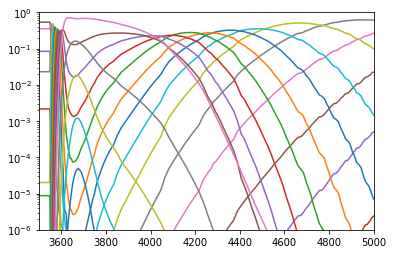

In [12]:
for ion in Element('iron',[1e6]*u.K):
    y_nei = em_model.get_ionization_fraction(field.loops[50], ion)
    plt.plot(field.loops[50].time,y_nei[:,0])
plt.yscale('log')
plt.ylim(1e-6,1)
plt.xlim(3500,5000)

In [13]:
em_model.save('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/emission_model.json')